# Time Series, Stock Price

## Copulas
Copulas capture the dependence structure between random variables without altering their individual behaviors
1. Definition: A copula: $C:[0,1]^2 → [0,1]$ is a multivariate cumulative distribution function (CDF) whose one-dimensional margins are uniform on $[0, 1]$, where $U$ and $V$ are random variables with uniform distributions on $[0, 1]$:
   $$C(u,v)=P(U\le u, V\le v)$$
2. **Sklar**’s Theorem: Every multivariate distribution function can be expressed in terms of its margins and copula. Given a bivariate distribution function $H(x,y)$ with margins $F(x)$ and $G(y)$, there exists a copula $C(u,v)$ such that:
   $$ H(x,y)=C(F(x),G(y))$$
3. kinds of copula:
 - Gaussian Copula: Perhaps the most well-known, the Gaussian copula captures linear dependencies between variables. It derives from the multivariate normal distribution. This copula is often favored for its mathematical simplicity but can underestimate tail dependencies.
- Clayton Copula: This copula is asymmetrical and is particularly useful when modelling lower tail dependence, which means it’s well-suited for scenarios where joint extreme low values are of concern.
- Gumbel Copula: The opposite of the Clayton copula, the Gumbel copula models upper tail dependence. It’s employed when the concern is about joint extreme high values.
 - Frank Copula: This copula does not capture tail dependencies but offers an intermediate dependence structure. It’s useful in scenarios where the tails of distributions are not of primary concern.     
## Reference
1. [copulous](https://medium.com/@crisvelasquez/stock-scenario-modelling-tail-risk-dependence-with-copulas-in-python-25591885366f)

In [55]:
# others uses one by one installation

!pip install --no-deps multi-prophet

  Using cached multi_prophet-1.1.1-py3-none-any.whl (5.5 kB)

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [1]:
# numerical and statistical utilities
import numpy as np
from scipy import stats
from scipy.stats import norm
from scipy.stats import rankdata

# visualization requirements
import matplotlib.pyplot as plt
import seaborn as sns
#from IPython.display import display,Latex,HTML
#from termcolor import colored

# data utitilies
import yfinance as yf
import pandas as pd
import pandas_ta as ta
import datetime as dt

from copulas.bivariate import Clayton

# system utilities
from tqdm import tqdm
import gc

%matplotlib inline

In [42]:
# 1. Data Collection:
# Definestock basket
# 台積電，聯發科， 前鼎， 金星科，鈊象，台灣指數
stocks = ["2330.TW", "2454.TW", "4908.TWO", "6533.TW","3293.TWO","^TWII"]
# Fetch data

# 1. Data Collection:
# Definestock basket
start = dt.datetime(2020, 1, 1).strftime('%Y-%m-%d')
#end   = dt.datetime(2023, 2, 9).strftime('%Y-%m-%d')
end =  dt.date.today()

data = yf.download(stocks, start=start, end=end)['Adj Close']

[*********************100%%**********************]  6 of 6 completed


In [44]:
data

2330.TW     2454.TW    3293.TWO    4908.TWO     6533.TW  \
Date                                                                     
2020-01-02  310.429169  333.562134  148.008911   34.671494  131.221664   
2020-01-03  310.886963  328.273499  145.184341   33.120296  126.798477   
2020-01-06  304.019043  320.340576  145.372620   33.539539  126.798477   
2020-01-07  301.729767  321.851562  147.255707   32.868752  123.849663   
2020-01-08  301.729767  325.251434  152.528290   32.701054  123.358200   
...                ...         ...         ...         ...         ...   
2024-01-25  642.000000  943.000000  810.000000   85.599998  478.000000   
2024-01-26  644.000000  936.000000  799.000000   89.000000  472.000000   
2024-01-29  648.000000  938.000000  825.000000   97.900002  492.500000   
2024-01-30  642.000000  963.000000  831.000000  103.000000  492.500000   
2024-01-31  628.000000  966.000000  830.000000  113.000000  494.500000   

                   ^TWII  
Date                      
2020-01-02  12100.480469  
2020-01-03  12110.429688  
2020-01-06  11953.360352  
2020-01-07  11880.320312  
2020-01-08  11817.099609  
...                  ...  
2024-01-25  18002.619141  
2024-01-26  17995.029297  
2024-01-29  18119.630859  
2024-01-30  18034.630859  
2024-01-31  17889.560547  

[995 rows x 6 columns]

In [45]:
# 2. Data Preprocessing:
# Compute daily returns and drop NaN values
returns = data.pct_change().dropna()

In [46]:
# Convert data to uniform using ECDF
def to_uniform(column):
    n = len(column)
    return rankdata(column) / (n + 1)

uniform_data = returns.apply(to_uniform)
uniform_data

2330.TW   2454.TW  3293.TWO  4908.TWO   6533.TW     ^TWII
Date                                                                  
2020-01-03  0.520603  0.191960  0.127638  0.050251  0.130653  0.500503
2020-01-06  0.077387  0.111558  0.503518  0.727638  0.491960  0.092462
2020-01-07  0.291457  0.602010  0.741709  0.162814  0.213065  0.233166
2020-01-08  0.493467  0.705528  0.928643  0.388945  0.443216  0.254271
2020-01-09  0.930653  0.768844  0.991960  0.856784  0.731658  0.903518
...              ...       ...       ...       ...       ...       ...
2024-01-25  0.928643  0.657286  0.137688  0.178894  0.403015  0.757789
2024-01-26  0.562814  0.326633  0.223116  0.915578  0.349749  0.433166
2024-01-29  0.665327  0.545729  0.916583  0.998995  0.878392  0.752764
2024-01-30  0.247236  0.869347  0.647236  0.940704  0.491960  0.270352
2024-01-31  0.078392  0.564824  0.453266  0.976884  0.544724  0.184925

[994 rows x 6 columns]

## Pycaret
is a less-code package.

*** Reference
1. [Pycaret for Time-series](https://pub.towardsai.net/time-series-forecasting-using-pycaret-bc1519113864)


In [41]:
# if error occurs,  

!pip install -U threadpoolctl==3.1.0

  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 3.2.0
    Uninstalling threadpoolctl-3.2.0:
      Successfully uninstalled threadpoolctl-3.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pycaret 3.1.0 requires kaleido>=0.2.1, which is not installed.
pycaret 3.1.0 requires pyod>=1.0.8, which is not installed.
pycaret 3.1.0 requires schemdraw==0.15, which is not installed.
pycaret 3.1.0 requires tbats>=1.1.3, which is not installed.
pycaret 3.1.0 requires joblib>=1.2.0, but you have joblib 1.1.1 which is incompatible.
pycaret 3.1.0 requires numpy<1.24,>=1.21, but you have numpy 1.26.1 which is incompatible.
pycaret 3.1.0 requires pandas<2.0.0,>=1.3.0, but you have pandas 2.1.3 which is incompatible.
pycaret 3.1.0 requires scipy~=1.10.1, but you have scipy 1.11.3 w

In [25]:
!pip install tbats

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 674.4 kB/s eta 0:00:00 0:00:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pycaret 3.1.0 requires kaleido>=0.2.1, which is not installed.
pycaret 3.1.0 requires pyod>=1.0.8, which is not installed.
pycaret 3.1.0 requires schemdraw==0.15, which is not installed.
pycaret 3.1.0 requires joblib>=1.2.0, but you have joblib 1.1.1 which is incompatible.
pycaret 3.1.0 requires numpy<1.24,>=1.21, but you have numpy 1.26.1 which is incompatible.
pycaret 3.1.0 requires pandas<2.0.0,>=1.3.0, but you have pandas 2.1.3 which is incompatible.
pycaret 3.1.0 requires scipy~=1.10.1, but you have scipy 1.11.3 which is incompatible.

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [18]:
data_TWMC=pd.DataFrame()
data_TWMC['ds']=list(data.index)
data_TWMC['y']=list(data['2330.TW'])

In [18]:
data_TWMC=pd.DataFrame()
data_TWMC['ds']=list(data.index)
data_TWMC['y']=list(data['2330.TW'])

In [47]:
data_5=pd.DataFrame()
data_5['ds']=list(data.index)
data_5['y']=list(data['3293.TWO'])

# Prophet

The mathematical equation behind the Prophet model is defined as:

$y(t) = g(t) + s(t) + h(t) + \epsilon(t)$

with, 
- $g(t)$ representing the trend. Prophet uses a piecewise linear model for trend forecasting.
- $s(t)$ represents periodic changes (weekly, monthly, yearly).
- $h(t)$ represents the effects of holidays (recall: Holidays impact businesses).
- $\epsilon(t)$ is the error term.

References
---
1. [Meta prophet](https://github.com/facebook/prophet) univariate Time series
2. [multi-prophet](https://github.com/vonum/multi-prophet), multivariate Time series , based on Facebook/Prophet.

In [48]:
from prophet import Prophet
m = Prophet(daily_seasonality = True) # the Prophet class (model)
m.fit(data_5) # fit the model using all data

08:03:56 - cmdstanpy - INFO - Chain [1] start processing
08:03:56 - cmdstanpy - INFO - Chain [1] done processing


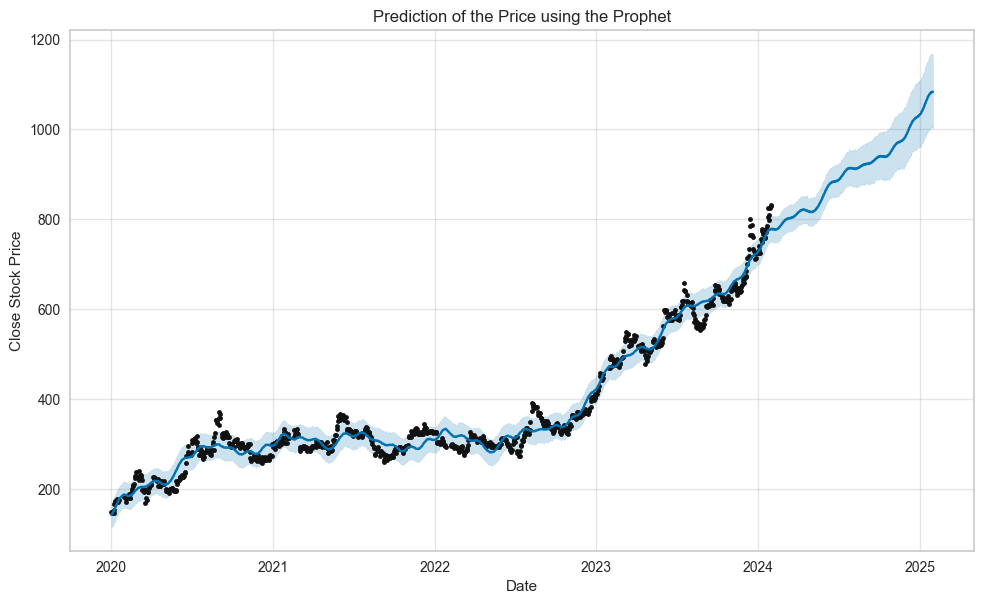

In [49]:
future = m.make_future_dataframe(periods=365) #we need to specify the number of days in future
prediction = m.predict(future)
m.plot(prediction)
plt.title("Prediction of the Price using the Prophet")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()

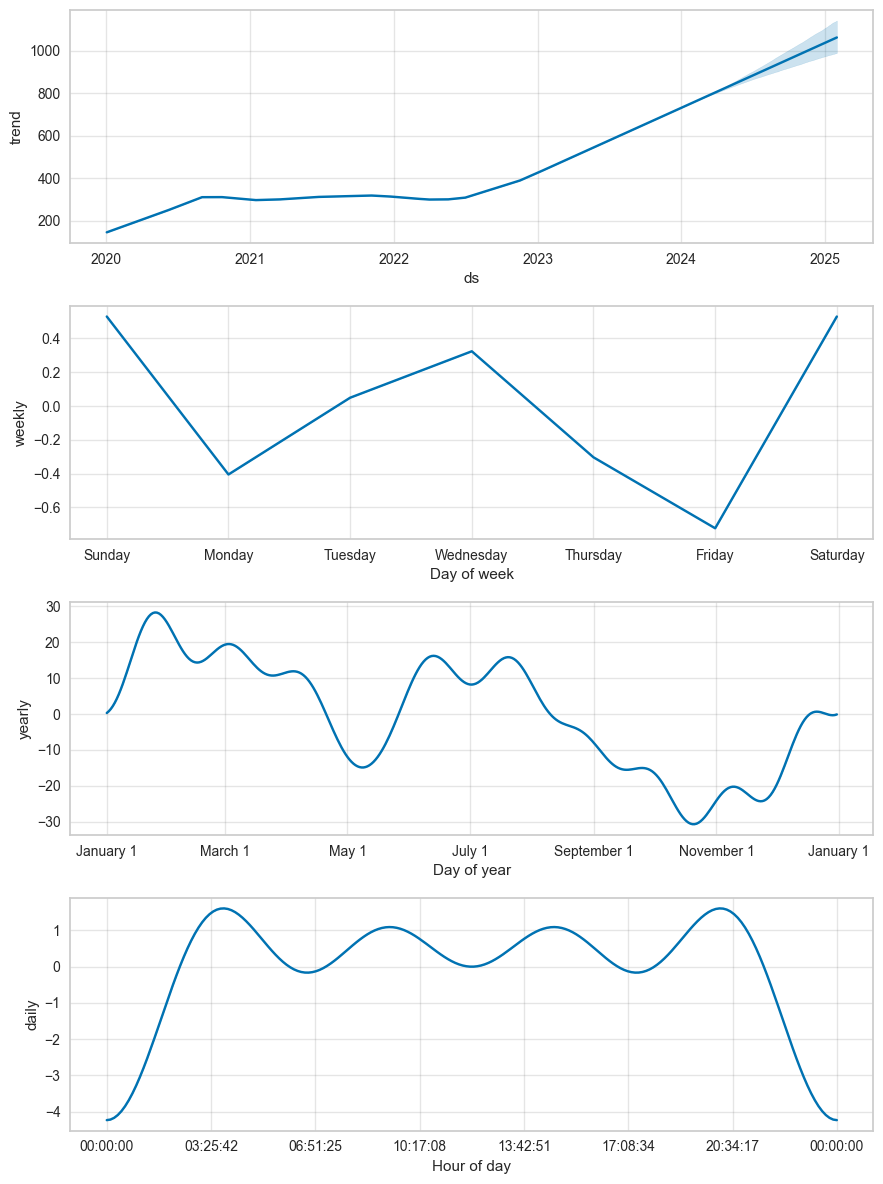

In [50]:
m.plot_components(prediction)
plt.show()

## Multi-variete Time-Series, MultiProphet

Prophet is only suited for Univariete time series data and MultiProphet for multivariete time series as its name.

In [56]:
# dataframe needs to have column ds, and it has y1 and y2 as dependent variables
from multi_prophet import MultiProphet

In [64]:
data2=pd.DataFrame()
data2['ds']=list(data.index)
data2['y1']=list(data['2330.TW'])
data2['y2']=list(data['2454.TW'])


In [70]:
data2.dtypes

ds    datetime64[ns]
y1           float64
y2           float64
dtype: object

In [74]:
m = MultiProphet(columns=["y1", "y2"])
m.fit(data2)

21:56:22 - cmdstanpy - INFO - Chain [1] start processing
21:56:22 - cmdstanpy - INFO - Chain [1] done processing
21:56:22 - cmdstanpy - INFO - Chain [1] start processing
21:56:22 - cmdstanpy - INFO - Chain [1] done processing


In [73]:
m

In [75]:
future = m.make_future_dataframe(periods=365)
future.tail()

ds
1355 2025-01-26
1356 2025-01-27
1357 2025-01-28
1358 2025-01-29
1359 2025-01-30

{'y1': <Figure size 1000x600 with 1 Axes>,
 'y2': <Figure size 1000x600 with 1 Axes>}

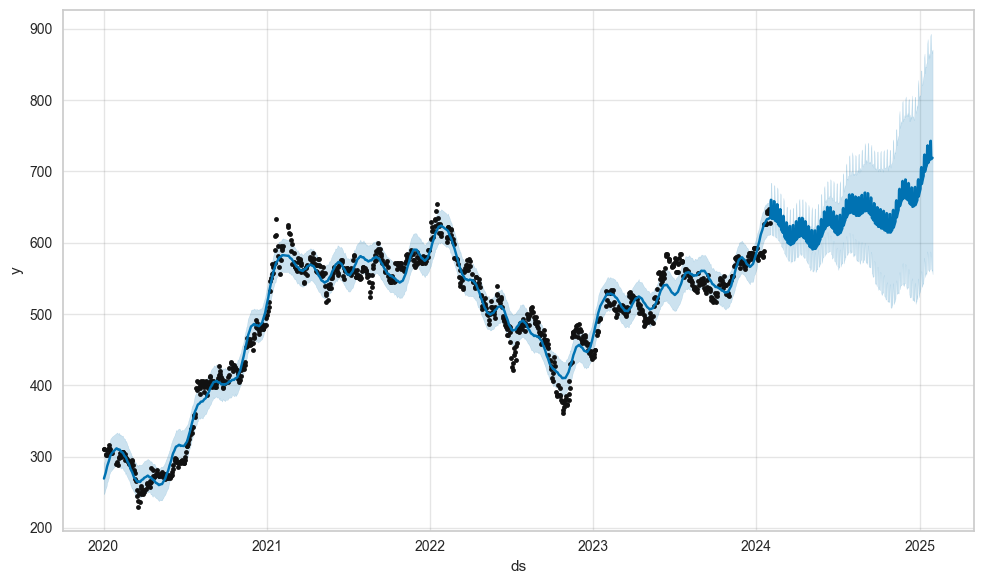

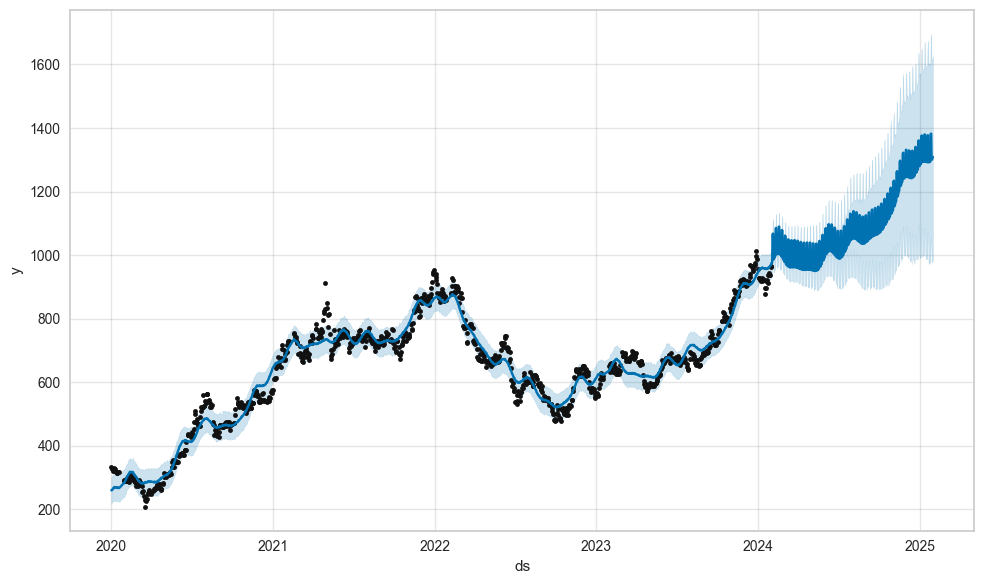

In [81]:
#future = m.create_future_dataframe(df)

forecast = m.predict(future)
m.plot(forecast)

{'y1': <Figure size 900x900 with 3 Axes>,
 'y2': <Figure size 900x900 with 3 Axes>}

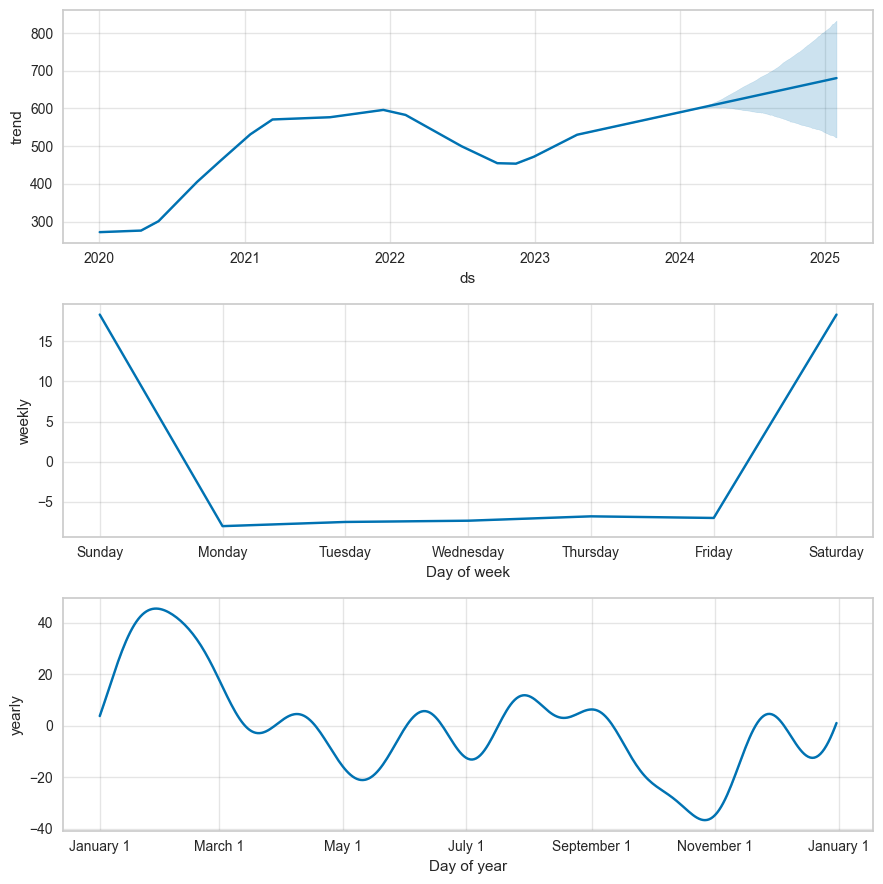

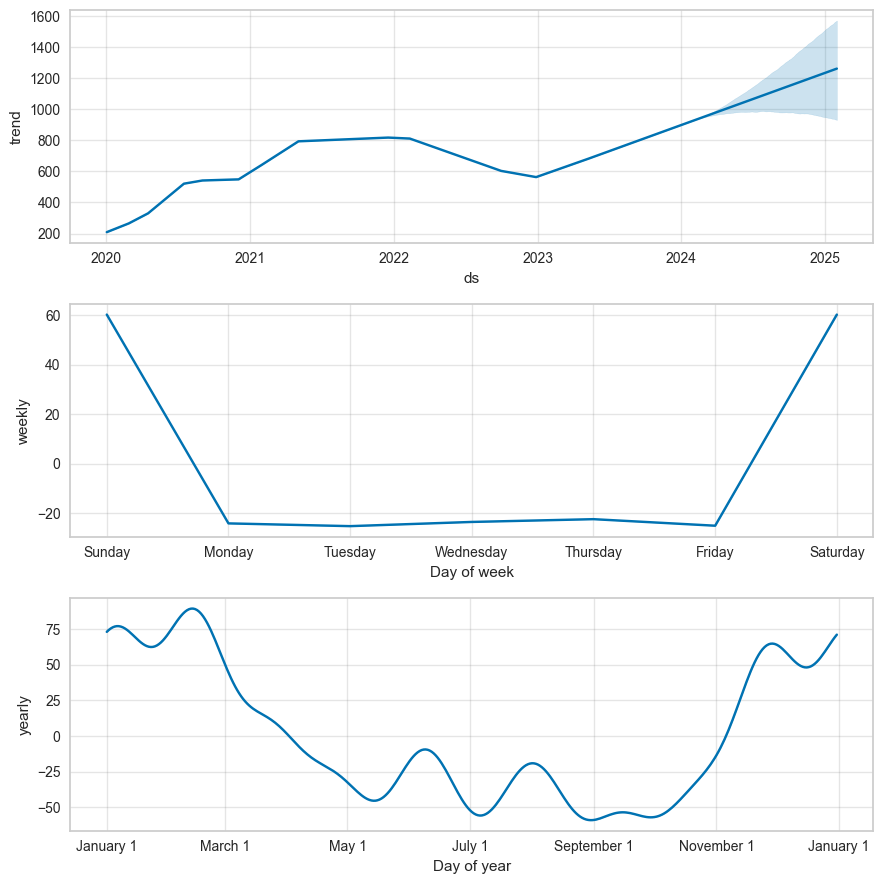

In [99]:
m.plot_components(forecast)

## Add new features


In [89]:
data3=pd.DataFrame()
data3['ds']=list(data.index)
data3['y1']=list(data['2330.TW'])
data3['y2']=list(data['2454.TW'])
data3['^TWII']=list(data['^TWII'])
m2 = MultiProphet(columns=["y1", "y2"])

# For all dependent variables
m2.add_regressor("^TWII")

# For selected dependent variables
# m2.add_regressor("Matchday", columns=["y"])

m2.fit(data3)


10:15:43 - cmdstanpy - INFO - Chain [1] start processing
10:15:43 - cmdstanpy - INFO - Chain [1] done processing
10:15:43 - cmdstanpy - INFO - Chain [1] start processing
10:15:43 - cmdstanpy - INFO - Chain [1] done processing


In [98]:
m2.plot_components(future2)

KeyError: 'ds'

In [ ]:
# ? how to get the future TWII
future2 = m2.make_future_dataframe(periods=365)
forecast2 = m2.predict(future2)
m2.plot(forecast2)

## Pycaret

In [ ]:
'''Import Time Series libraries'''
from pycaret.time_series import *

In [40]:
exp = TSForecastingExperiment()
exp.setup(
    data=data_TWMC, fh=3, fold=5, target='y', session_id=42
)

In [41]:
exp.compare_models()

NaiveForecaster()

In [26]:
'''Initialize the training environment'''
s = setup(data_TWMC, target='y',fh = 3, fold = 5, session_id = 101)

In [29]:
# check statistical tests on original data
check_stats()

Test   Test Name         Data             Property  \
0        Summary  Statistics  Transformed               Length   
1        Summary  Statistics  Transformed     # Missing Values   
2        Summary  Statistics  Transformed                 Mean   
3        Summary  Statistics  Transformed               Median   
4        Summary  Statistics  Transformed   Standard Deviation   
5        Summary  Statistics  Transformed             Variance   
6        Summary  Statistics  Transformed             Kurtosis   
7        Summary  Statistics  Transformed             Skewness   
8        Summary  Statistics  Transformed    # Distinct Values   
9    White Noise   Ljung-Box  Transformed       Test Statictic   
10   White Noise   Ljung-Box  Transformed       Test Statictic   
11   White Noise   Ljung-Box  Transformed              p-value   
12   White Noise   Ljung-Box  Transformed              p-value   
13   White Noise   Ljung-Box  Transformed          White Noise   
14   White Noise   Ljung-Box  Transformed          White Noise   
15  Stationarity         ADF  Transformed         Stationarity   
16  Stationarity         ADF  Transformed              p-value   
17  Stationarity         ADF  Transformed       Test Statistic   
18  Stationarity         ADF  Transformed    Critical Value 1%   
19  Stationarity         ADF  Transformed    Critical Value 5%   
20  Stationarity         ADF  Transformed   Critical Value 10%   
21  Stationarity        KPSS  Transformed   Trend Stationarity   
22  Stationarity        KPSS  Transformed              p-value   
23  Stationarity        KPSS  Transformed       Test Statistic   
24  Stationarity        KPSS  Transformed   Critical Value 10%   
25  Stationarity        KPSS  Transformed    Critical Value 5%   
26  Stationarity        KPSS  Transformed  Critical Value 2.5%   
27  Stationarity        KPSS  Transformed    Critical Value 1%   
28     Normality     Shapiro  Transformed            Normality   
29     Normality     Shapiro  Transformed              p-value   

                     Setting         Value  
0                                    994.0  
1                                      0.0  
2                               490.788441  
3                                522.56601  
4                                99.005383  
5                               9802.06578  
6                                -0.025853  
7                                -0.987958  
8                                    701.0  
9   {'alpha': 0.05, 'K': 24}   20638.16053  
10  {'alpha': 0.05, 'K': 48}  36030.932139  
11  {'alpha': 0.05, 'K': 24}           0.0  
12  {'alpha': 0.05, 'K': 48}           0.0  
13  {'alpha': 0.05, 'K': 24}           0.0  
14  {'alpha': 0.05, 'K': 48}           0.0  
15           {'alpha': 0.05}         False  
16           {'alpha': 0.05}      0.541339  
17           {'alpha': 0.05}     -1.484147  
18           {'alpha': 0.05}     -3.436953  
19           {'alpha': 0.05}     -2.864455  
20           {'alpha': 0.05}     -2.568322  
21           {'alpha': 0.05}         False  
22           {'alpha': 0.05}          0.01  
23           {'alpha': 0.05}      0.765729  
24           {'alpha': 0.05}         0.119  
25           {'alpha': 0.05}         0.146  
26           {'alpha': 0.05}         0.176  
27           {'alpha': 0.05}         0.216  
28           {'alpha': 0.05}         False  
29           {'alpha': 0.05}           0.0

In [28]:
best=compare_models()

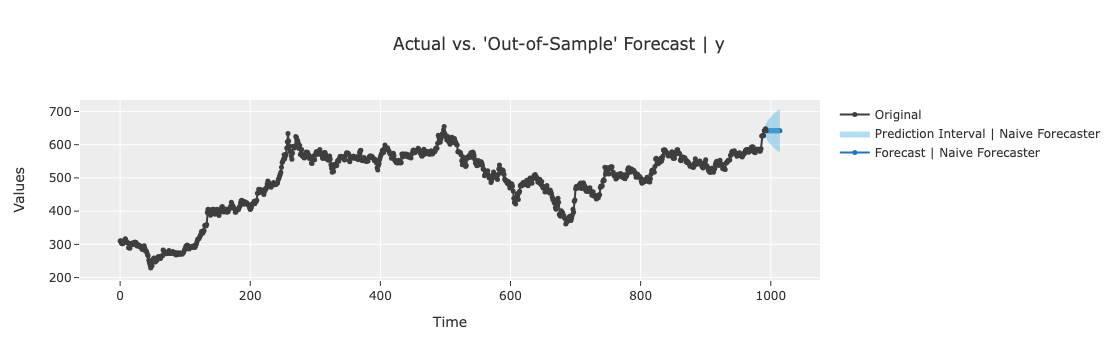

In [30]:
'''Plot forecasting using functional API'''
plot_model(best, plot = 'forecast', data_kwargs = {'fh' : 24})


In [31]:
# predict on test set
holdout_pred = predict_model(best)

In [32]:
# show predictions df
holdout_pred.tail()

y_pred
991   642.0
992   642.0
993   642.0

## Copulas

In [51]:
# 3. Rolling Time Window Analysis:
# Rolling window analysis
window_size = 250
tail_parameters = []

for start in range(0, len(uniform_data) - window_size):
    window_data = uniform_data.iloc[start:start + window_size]
    
    copula = Clayton()
    copula.fit(window_data.values)
    
    # Extract tail parameter (for Clayton, the theta parameter)
    tail_parameters.append(copula.theta)

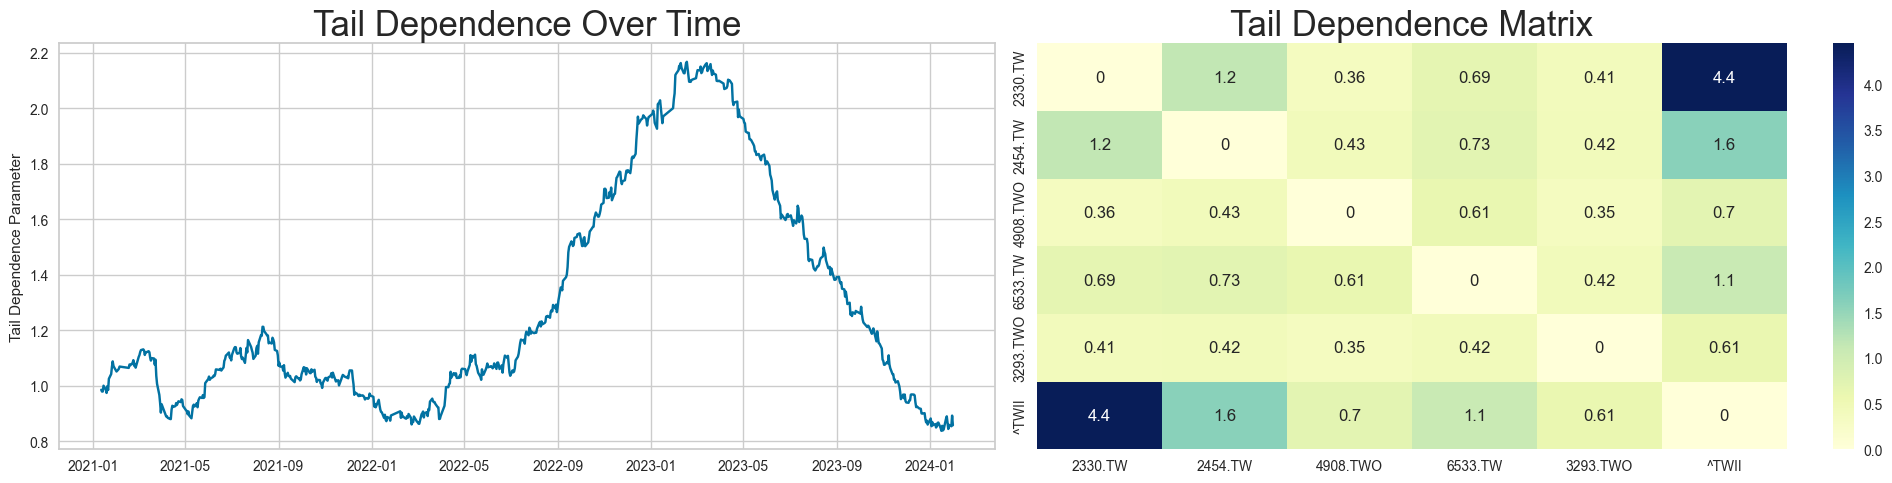

In [52]:
# 4. Visualization:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))  # 1 row, 2 columns

# Plotting the Tail Dependence Over Time on the first subplot
ax1.plot(returns.index[window_size:], tail_parameters)
ax1.set_title('Tail Dependence Over Time',fontsize=25)
ax1.set_ylabel('Tail Dependence Parameter')

# Constructing the Tail Dependence Matrix
tail_dep_matrix = np.zeros((len(stocks), len(stocks)))
for i in range(len(stocks)):
    for j in range(len(stocks)):
        if i != j:
            copula_ij = Clayton()
            copula_ij.fit(uniform_data[[stocks[i], stocks[j]]].values)
            tail_dep_matrix[i, j] = copula_ij.theta
# Plotting the heatmap on the second subplot
sns.heatmap(tail_dep_matrix, annot=True, cmap='YlGnBu', xticklabels=stocks, yticklabels=stocks, ax=ax2)
ax2.set_title("Tail Dependence Matrix", fontsize=25)

plt.tight_layout()  
plt.show()

**Above**,Visual Analysis of Tail Dependence among Selected Stocks: T
1. he left graph reveals the rolling tail dependence over time, highlighting periods with heightened joint extreme behavior.
2. The right heatmap provides a pairwise tail dependence matrix, offering insights into which pairs of assets exhibit stronger extreme co-movements. Particularly, the intensity of colors in the heatmap denotes the strength of tail dependence between asset pairs, with darker shades indicating stronger dependence.

Chis means, TWII is heavily dependent on **TSMC**.

## The Power of Copulas in Financial Analysis
### Why copulas offer a superior approach for scenario modelling
Copulas stand out because they allow for the examination of individual asset behaviors (through their marginals) and their interrelationships (through the copula itself). This duality makes them perfect for scenario modelling, capturing nuanced relationships beyond mere correlation.

### Insights derived from applying copulas and tail dependencies
From our analysis, observing the evolution of tail dependencies over time can provide crucial insights into how the dependency structure shifts during market events. A rising tail dependence parameter, for instance, might indicate increasing concurrence of extreme losses in assets, signaling a red flag for diversified portfolios.

### Real-world implications of using copulas
For portfolio managers, understanding tail dependencies means better risk management. If two assets tend to suffer extreme losses together, diversifying across them may offer limited risk reduction. Copulas, thus, can guide better asset allocation, hedging strategies, and stress-testing exercises.



## Limitations and Criticisms of Using Copulas
While copulas offer robust tools for financial modelling, they aren’t without challenges:

- Misspecification Risk: The choice of copula matters. Using an incorrect copula can lead to misleading results.
- Static Nature: While rolling windows capture evolving dependencies, copulas themselves don’t inherently model changing relationships over time.
- Data Sensitivity: Small changes in input data might lead to significant shifts in the copula parameter estimates.